In [1]:
!git clone https://github.com/wlw2021/DS-for-Business

%cd DS-for-Business/'proposal datasets'/"students' performance"/

Cloning into 'DS-for-Business'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 57 (delta 8), reused 15 (delta 3), pack-reused 26
Receiving objects: 100% (57/57), 199.34 MiB | 12.26 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (22/22), done.
/content/DS-for-Business/proposal datasets/students' performance


**Details of DataSet-Exploration**

In [2]:
import pandas as pd
import subprocess

math_data = pd.read_csv('student-mat.csv', sep=';')
portuguese_data = pd.read_csv('student-por.csv', sep=';')

print("Columns of math_data:", math_data.columns)
print("Columns of portuguese_data:", portuguese_data.columns)

common_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                  'Mjob', 'Fjob', 'reason', 'guardian']

merged_data = pd.merge(math_data, portuguese_data, how='inner', on=common_columns)

print("Shape of merged dataset:", merged_data.shape)

Columns of math_data: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Columns of portuguese_data: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Shape of merged dataset: (383, 54)


In [ ]:
print(math_data.head(10))

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...  

In [ ]:
summary_stats = portuguese_data.describe()
print(summary_stats)

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

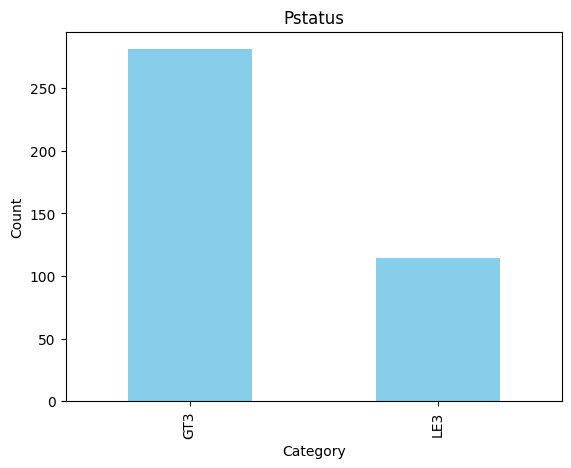

In [ ]:
category_counts_1 = math_data['famsize'].value_counts()
# Plot the grouped bar plot
category_counts_1.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Pstatus')

# Show the plot
plt.show()

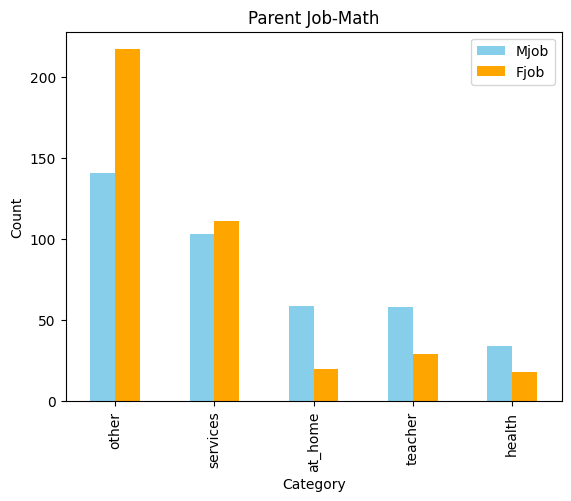

In [ ]:
category_counts_1 = math_data['Mjob'].value_counts()
category_counts_2 = math_data['Fjob'].value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.concat([category_counts_1, category_counts_2], axis=1)
combined_counts.columns = ['Mjob', 'Fjob']

# Plot the grouped bar plot
combined_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Parent Job-Math')

# Show the plot
plt.show()

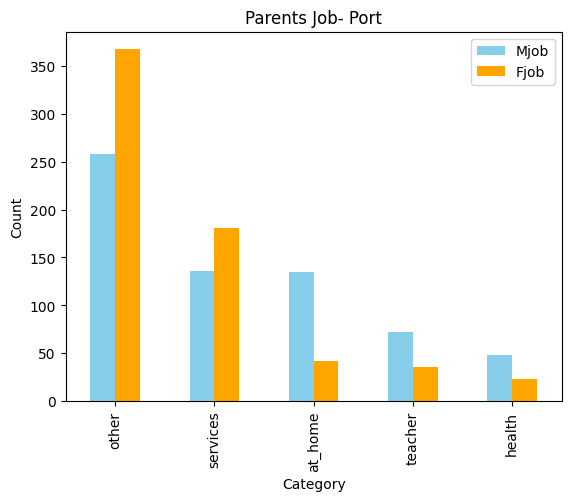

In [ ]:
category_counts_1 = portuguese_data['Mjob'].value_counts()
category_counts_2 = portuguese_data['Fjob'].value_counts()

# Combine counts into a single DataFrame
combined_counts = pd.concat([category_counts_1, category_counts_2], axis=1)
combined_counts.columns = ['Mjob', 'Fjob']

# Plot the grouped bar plot
combined_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Parents Job- Port')

# Show the plot
plt.show()

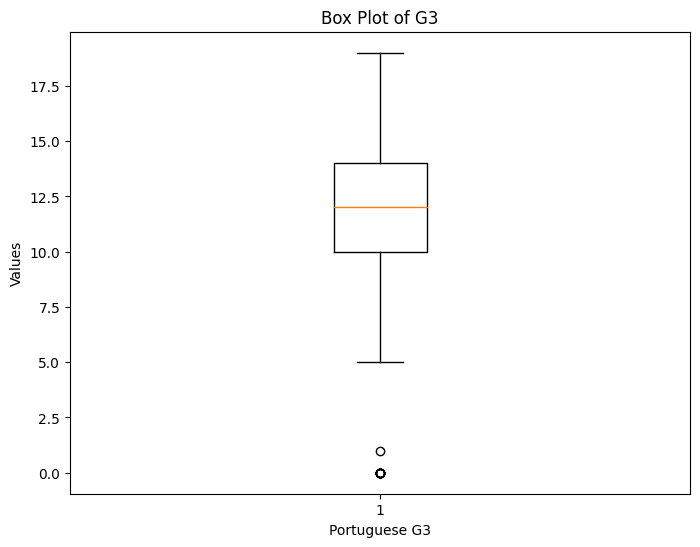

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_split is your DataFrame containing the column 'G3'

# Create a box plot for the column 'G3'
plt.figure(figsize=(8, 6))
plt.boxplot(portuguese_data['G3'])


plt.title('Box Plot of G3')
plt.xlabel('Portuguese G3')
plt.ylabel('Values')
plt.show()

**Linear Regression Script with Cross-Validation: Baseline**

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

X = portuguese_data.drop('G3', axis=1)
y = portuguese_data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = make_pipeline(preprocessor, LinearRegression())
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

ln_avg_rmse = np.sqrt(-cv_scores.mean())
y_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Average Root Mean Squared Error (RMSE) for Linear Regression with Cross-Validation:", test_rmse,ln_avg_rmse)

Average Root Mean Squared Error (RMSE) for Linear Regression with Cross-Validation: 1.214852547454494 1.3307583553984703


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.8486556914045911


**Adding 'performance' metric**

In [4]:
X['performance'] = X['studytime'] / (X['failures'] +X['freetime'] + X['traveltime'])

**Linear Regression: Engineered features**

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = make_pipeline(preprocessor, LinearRegression())
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

ln_avg_rmse = np.sqrt(-cv_scores.mean())
y_pred_engg = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Average Root Mean Squared Error (RMSE) for Linear Regression with Cross-Validation:", test_rmse,ln_avg_rmse)

Average Root Mean Squared Error (RMSE) for Linear Regression with Cross-Validation: 1.214852547454494 1.3294862696097922


In [7]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, y_pred_engg)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.8462045114887145


**Decision Tree Regression with Cross-Validation**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
math_data = pd.read_csv('student-mat.csv', delimiter=';')
portuguese_data = pd.read_csv('student-por.csv', delimiter=';')



categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

transformed_data = preprocessor.fit_transform(X_train)
transformed_test_data=preprocessor.fit_transform(X_test)

tree_model = DecisionTreeRegressor()


param_grid = {
    'max_depth': [ 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [ 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'random_state': [42]  # Random seed for reproducibility
}
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(transformed_data, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_tree_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_tree_model, transformed_data, y_train, cv=5, scoring='neg_mean_squared_error')

dt_avg_rmse = (-cv_scores.mean()) ** 0.5
y_pred = best_tree_model.predict(transformed_test_data)
test_dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Average Root Mean Squared Error (RMSE) for Decision Tree Regression with Cross-Validation:", dt_avg_rmse,test_dt_rmse)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}
Average Root Mean Squared Error (RMSE) for Decision Tree Regression with Cross-Validation: 2.045185719647902 2.134972261881959


In [ ]:
from sklearn.metrics import r2_score
y_pred_tree = best_tree_model.predict(transformed_test_data)

r2 = r2_score(y_test, y_pred_tree)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.6932338493050105


**Random Forest Regression with Cross-Validation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

forest_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(transformed_data, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_forest_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_forest_model, transformed_data, y_train, cv=5, scoring='neg_mean_squared_error')

pipeline = make_pipeline(preprocessor, model)


rf_avg_rmse = (-cv_scores.mean()) ** 0.5
y_pred = best_forest_model.predict(transformed_test_data)
test_rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Average Root Mean Squared Error (RMSE) for Random Forest Regression with Cross-Validation:", rf_avg_rmse,test_rf_rmse)

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Average Root Mean Squared Error (RMSE) for Random Forest Regression with Cross-Validation: 1.5982537385342068 1.6101561246433513


In [ ]:
from sklearn.metrics import r2_score
y_pred_tree = best_forest_model.predict(transformed_test_data)

r2 = r2_score(y_test, y_pred_tree)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7341388170021493


**Support Vector Regression (SVR)**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf'],  # Kernel type: linear or radial basis function (RBF)
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': [0.01, 0.1, 1, 'scale']  # Kernel coefficient for RBF kernel
}

transformed_data=preprocessor.fit_transform(X_train)

svr_model = SVR()

grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(transformed_data, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_svr_model = grid_search.best_estimator_

svr_y_pred = best_svr_model.predict(preprocessor.fit_transform(X_test))
svr_test_rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
cv_scores = cross_val_score(best_forest_model, transformed_data, y_train, cv=5, scoring='neg_mean_squared_error')
svr_avg_rmse = (-cv_scores.mean()) ** 0.5





print("Support Vector Regression RMSE:", svr_avg_rmse,svr_test_rmse)

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Support Vector Regression RMSE: 1.6264099569436794 1.2425640448485662


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, svr_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.8416724390560771


**Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet,Lasso,Ridge

gb_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (shrinkage)
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [ 'sqrt', 'log2']  # Number of features to consider at each split
}


gb_model = GradientBoostingRegressor()

transformed_data=gb_preprocessor.fit_transform(X_train)


grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(transformed_data, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_gb_model = grid_search.best_estimator_

best_gb_model.fit(transformed_data, y_train)



cv_scores = cross_val_score(best_gb_model, transformed_data, y_train, cv=5, scoring='neg_mean_squared_error')
gb_avg_rmse = (-cv_scores.mean()) ** 0.5
gb_y_pred = best_gb_model.predict(gb_preprocessor.fit_transform(X_test))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))

print("Gradient Boosting Regression RMSE:", gb_avg_rmse, gb_test_rmse)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Gradient Boosting Regression RMSE: 1.3987112748681627 1.4538705620696541


In [ ]:
from sklearn.metrics import r2_score
y_pred_tree = best_tree_model.predict(transformed_test_data)

r2 = r2_score(y_test, gb_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7832443421872578


**Ridge Regression:**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

param_grid = {
    'alpha': [0.1,100,1,10]
}

encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))

X_numeric = X_train.select_dtypes(exclude=['object'])

X_processed = np.concatenate((X_numeric, X_encoded), axis=1)

from sklearn.linear_model import Ridge

ridge_model = Ridge()
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(X_processed, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_ridge_model = grid_search.best_estimator_
ridge_cv_scores = cross_val_score(best_ridge_model, X_processed, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_avg_rmse = np.sqrt(-ridge_cv_scores.mean())
ridge_y_pred = best_gb_model.predict(gb_preprocessor.fit_transform(X_test))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))

print("Ridge Regression RMSE:", ridge_avg_rmse,ridge_test_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'alpha': 100}
Ridge Regression RMSE: 1.2940119864889343 1.4538705620696541


In [ ]:
from sklearn.metrics import r2_score
y_pred_tree = best_tree_model.predict(transformed_test_data)

r2 = r2_score(y_test, ridge_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7832443421872578


**Lasso Regression:**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = X_train.select_dtypes(include=['object']).columns

param_grid = {
    'alpha': [0.1,100,1,10]
}

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_train_encoded = preprocessor.fit_transform(X_train)

lasso_model = Lasso()
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(X_processed, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_lasso_model = grid_search.best_estimator_
lasso_cv_scores = cross_val_score(best_lasso_model, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_avg_rmse = np.sqrt(-lasso_cv_scores.mean())
lasso_y_pred = best_gb_model.predict(gb_preprocessor.fit_transform(X_test))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))

print("Lasso Regression RMSE:", lasso_avg_rmse,lasso_test_rmse)

Best Parameters: {'alpha': 0.1}
Lasso Regression RMSE: 2.940265170548906 1.4538705620696541


In [ ]:
from sklearn.metrics import r2_score
y_pred_tree = best_tree_model.predict(transformed_test_data)

r2 = r2_score(y_test, lasso_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7832443421872578


**ElasticNet Regression:**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_columns = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_train_encoded = preprocessor.fit_transform(X_train)

elasticnet_model = ElasticNet()
grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(X_train_encoded, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_elasticnet_model = grid_search.best_estimator_

elasticnet_cv_scores = cross_val_score(best_elasticnet_model, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
elasticnet_avg_rmse = np.sqrt(-elasticnet_cv_scores.mean())
elastic_y_pred = best_elasticnet_model.predict(preprocessor.fit_transform(X_test))
elastic_test_rmse = np.sqrt(mean_squared_error(y_test, elastic_y_pred))

print("ElasticNet Regression RMSE:", elasticnet_avg_rmse,elastic_test_rmse)

Best Parameters: {'alpha': 0.1}
ElasticNet Regression RMSE: 2.9127495947846214 1.4538705620696541


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, elastic_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.10857973890794914


**K-Nearest Neighbors Regression (KNN):**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_columns = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

transformed_data=preprocessor.fit_transform(X_train)

knn_model = KNeighborsRegressor()

knn_model.fit(transformed_data,y_train)

knn_cv_scores = cross_val_score(knn_model, transformed_data, y_train, cv=5, scoring='neg_mean_squared_error')

knn_avg_rmse = np.sqrt(-knn_cv_scores.mean())

knn_y_pred = knn_model.predict(preprocessor.fit_transform(X_test))
knn_test_rmse = np.sqrt(mean_squared_error(y_test, knn_y_pred))



print("KNeighborsRegressor RMSE:", knn_avg_rmse,knn_test_rmse)

KNeighborsRegressor RMSE: 3.1307121356769585 3.378529493501801


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, knn_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -0.17050799737870426


**LightGBM Regression:**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb
import numpy as np

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],          # Learning rate (shrinkage)
    'max_depth': [3, 4, 5, -1],                 # Maximum depth of each tree (-1 means no limit)
    'subsample': [0.8, 1.0],                    # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],             # Subsample ratio of columns when constructing each tree
    'min_child_samples': [20, 50, 100],         # Minimum number of samples required to create a leaf node
    'reg_alpha': [0.0, 0.1, 0.5],               # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.5]               # L2 regularization term on weights
}


categorical_columns = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ])

lgb_model = lgb.LGBMRegressor()

transformed_data=preprocessor.fit_transform(X_train)

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(transformed_data, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_lgb_model = grid_search.best_estimator_
lgb_cv_scores = cross_val_score(best_lgb_model, transformed_data, y_train, cv=5, scoring='neg_mean_squared_error')

lgb_avg_rmse = np.sqrt(-lgb_cv_scores.mean())

lgb_y_pred = best_lgb_model.predict(preprocessor.fit_transform(X_test))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_y_pred))

print("LightGBM Regression RMSE:", lgb_avg_rmse)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
from sklearn.metrics import r2_score
y_pred_tree = best_tree_model.predict(transformed_test_data)

r2 = r2_score(y_test, lgb_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.1397813968480177


In [ ]:
print("LightGBM Regression RMSE:", lgb_test_rmse)

LightGBM Regression RMSE: 2.896309288645574


**CatBoost Regression:**

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.0 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
categorical_features = X_train.select_dtypes(include=['object']).columns

#Calculate the 'performance' column based on the formula


encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

X_train_processed = np.concatenate([X_train_encoded.toarray(), X_train.drop(columns=categorical_features)], axis=1)
X_test_processed = np.concatenate([X_test_encoded.toarray(), X_test.drop(columns=categorical_features)], axis=1)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}
# Initialize GridSearchCV with CatBoostRegressor
catboost_model = CatBoostRegressor()
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_catboost_model = grid_search.best_estimator_



catboost_cv_scores = cross_val_score(best_catboost_model, X_train_processed, y_train, cv=5, scoring='neg_mean_squared_error')
catboost_avg_rmse = np.sqrt(-catboost_cv_scores.mean())





print("CatBoost Regression RMSE:", catboost_avg_rmse,catboost_test_rmse)

Streaming output truncated to the last 5000 lines.
0:	learn: 3.1745333	total: 698us	remaining: 698ms
1:	learn: 3.1578329	total: 1.74ms	remaining: 866ms
2:	learn: 3.1389170	total: 3.01ms	remaining: 1s
3:	learn: 3.1237982	total: 3.71ms	remaining: 925ms
4:	learn: 3.1025261	total: 4.62ms	remaining: 918ms
5:	learn: 3.0847762	total: 5.56ms	remaining: 921ms
6:	learn: 3.0694967	total: 7.07ms	remaining: 1s
7:	learn: 3.0538951	total: 8.02ms	remaining: 995ms
8:	learn: 3.0376185	total: 9.02ms	remaining: 993ms
9:	learn: 3.0228063	total: 10.9ms	remaining: 1.08s
10:	learn: 3.0052430	total: 11.9ms	remaining: 1.06s
11:	learn: 2.9880549	total: 12.8ms	remaining: 1.05s
12:	learn: 2.9716099	total: 13.7ms	remaining: 1.04s
13:	learn: 2.9584710	total: 14.6ms	remaining: 1.03s
14:	learn: 2.9413539	total: 18.1ms	remaining: 1.19s
15:	learn: 2.9250273	total: 19ms	remaining: 1.17s
16:	learn: 2.9110323	total: 19.9ms	remaining: 1.15s
17:	learn: 2.8948275	total: 20.8ms	remaining: 1.13s
18:	learn: 2.8808830	total: 22ms

CatBoostError: /src/catboost/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature 43 is present in model but not in pool.

In [ ]:
catboost_y_pred = best_catboost_model.predict(X_test_processed)
catboost_test_rmse = np.sqrt(mean_squared_error(y_test, catboost_y_pred))

print("CatBoost Regression RMSE:", catboost_avg_rmse,catboost_test_rmse)

CatBoost Regression RMSE: 1.2357456574880332 1.229052899235036


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, catboost_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.845096900608632


In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.01}


**Huber Regression:**


In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
#from catboost import CatBoostRegressor

categorical_features = X_train.select_dtypes(include=['object']).columns

#Calculate the 'performance' column based on the formula


encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

X_train_processed = np.concatenate([X_train_encoded.toarray(), X_train.drop(columns=categorical_features)], axis=1)
X_test_processed = np.concatenate([X_test_encoded.toarray(), X_test.drop(columns=categorical_features)], axis=1)

param_grid = {
    'epsilon': [1.0, 1.5, 2.0],  # Huber loss threshold
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'max_iter': [ 1000, 2000]  # Maximum number of iterations
}


huber_model = HuberRegressor()
grid_search = GridSearchCV(estimator=huber_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_huber_model = grid_search.best_estimator_

huber_cv_scores = cross_val_score(best_huber_model, X_train_processed, y_train, cv=5, scoring='neg_mean_squared_error')
huber_avg_rmse = np.sqrt(-huber_cv_scores.mean())

huber_y_pred = best_huber_model.predict(X_test_processed)
huber_test_rmse = np.sqrt(mean_squared_error(y_test, huber_y_pred))


print("Huber Regression RMSE:", huber_avg_rmse,huber_test_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best Parameters: {'alpha': 0.0001, 'epsilon': 2.0, 'max_iter': 1000}
Huber Regression RMSE: 1.3171328966090976 1.1391908318490829


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, huber_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.8669202677232579


**XGBoost Regression:**

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))

X_numeric = X_train.select_dtypes(exclude=['object'])

X_processed = np.concatenate((X_numeric, X_encoded), axis=1)

X_encoded = encoder.fit_transform(X_test.select_dtypes(include=['object']))

X_numeric = X_test.select_dtypes(exclude=['object'])

X_test_processed = np.concatenate((X_numeric, X_encoded), axis=1)

from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],          # Learning rate (shrinkage)
    'max_depth': [3, 4, 5, 6],                  # Maximum depth of each tree
    'subsample': [0.8, 1.0],                    # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],             # Subsample ratio of columns when constructing each tree
    'min_child_weight': [1, 5, 10],              # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.5],                     # Minimum loss reduction required to make a further partition
    'reg_alpha': [0.0, 0.1, 0.5],               # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.5]               # L2 regularization term on weights
}


xgb_model = XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on training data
grid_search.fit(X_processed, y_train)

print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

xgb_cv_scores = cross_val_score(best_xgb_model, X_processed, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_avg_rmse = np.sqrt(-xgb_cv_scores.mean())

xgboost_y_pred = best_xgb_model.predict(X_test_processed)
xgboost_test_rmse = np.sqrt(mean_squared_error(y_test, xgboost_y_pred))

print("XGBoost Regression RMSE:", xgb_avg_rmse,xgboost_test_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 50, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.8}
XGBoost Regression RMSE: 1.1874442452126388 1.2592278323305923


In [6]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.1 MB/s eta 0:00:00


In [10]:
X_test_processed.shape

(130, 41)

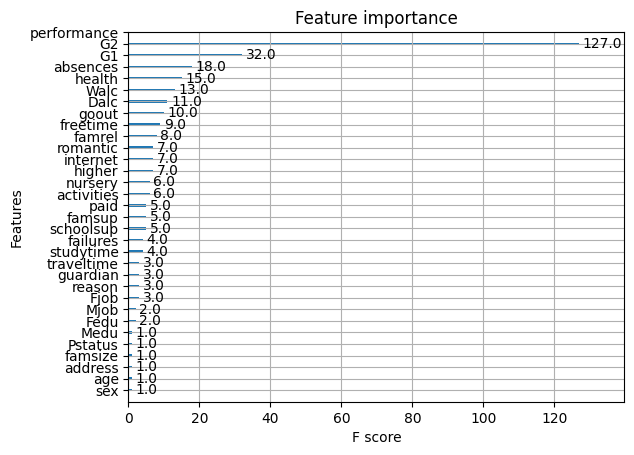

In [ ]:
feature_names = list(X_train.columns[1:])



# Plot feature importance with specified feature names as labels
xgb.plot_importance(best_xgb_model)
plt.yticks(range(len(feature_names)), feature_names)  # Set x-axis labels as feature names
plt.show()

In [ ]:
print(X_train.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'performance'],
      dtype='object')


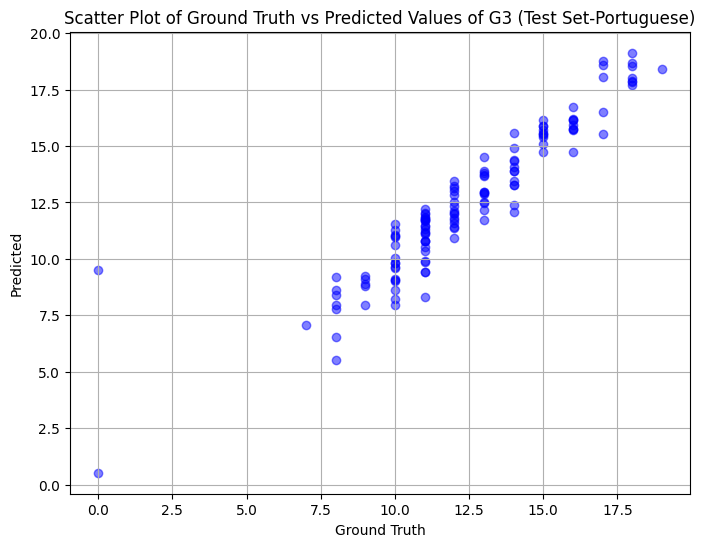

In [ ]:
import matplotlib.pyplot as plt

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Scatter Plot of Ground Truth vs Predicted Values of G3 (Test Set-Portuguese)')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, xgboost_y_pred)

    # Print R2 score for the current model

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.8488295376313838


**Models Comparisson**

In [ ]:
print("1-Linear Regression RMSE:", ln_avg_rmse)
print("2-Decision Tree Regression RMSE:", dt_avg_rmse)
print("3-Random Forest Regression RMSE:", rf_avg_rmse)
print("4-Gradient Boosting Regression RMSE:", gb_test_rmse)
print("5-Support Vector Regression RMSE:", svr_test_rmse)
print("6-Ridge Regression RMSE:", ridge_avg_rmse)
print("7-Lasso Regression RMSE:", lasso_avg_rmse)
print("8-ElasticNet Regression RMSE:", elasticnet_avg_rmse)
print("9-KNN Regression RMSE:", knn_avg_rmse)
print("10-LightGBM Regression RMSE:", lgb_avg_rmse)
print("11-CatBoost Regression RMSE:", catboost_avg_rmse)
print("12-Huber Regression RMSE:", huber_avg_rmse)
print("13-XGBoost Regression RMSE:", xgb_avg_rmse)

models_rmse = {
    "1-Linear Regression":ln_avg_rmse ,
    "2-Decision Tree Regression": dt_avg_rmse,
    "3-Random Forest Regression": rf_avg_rmse,
    "4-Gradient Boosting Regression": gb_avg_rmse,
    "5-Support Vector Regression": svr_avg_rmse,
    "6-Ridge Regression": ridge_avg_rmse,
    "7-Lasso Regression": lasso_avg_rmse,
    "8-ElasticNet Regression": elasticnet_avg_rmse,
    "9-KNN Regression": knn_avg_rmse,
    "10-LightGBM Regression": lgb_avg_rmse,
    "11-CatBoost Regression": catboost_avg_rmse,
    "12-Huber Regression": huber_avg_rmse,
    "13-XGBoost Regression\n": xgb_avg_rmse
}

best_model = min(models_rmse, key=models_rmse.get)
print("\nThe best model is:", best_model)

1-Linear Regression RMSE: 1.3294862696097922
2-Decision Tree Regression RMSE: 1.564946568548563
3-Random Forest Regression RMSE: 1.5982537385342068
4-Gradient Boosting Regression RMSE: 1.4538705620696541
5-Support Vector Regression RMSE: 1.2425640448485662
6-Ridge Regression RMSE: 1.2940119864889343
7-Lasso Regression RMSE: 2.9127495947846214
8-ElasticNet Regression RMSE: 2.9127495947846214
9-KNN Regression RMSE: 3.1307121356769585
10-LightGBM Regression RMSE: 2.8794896963313796
11-CatBoost Regression RMSE: 1.2357456574880332
12-Huber Regression RMSE: 1.3171328966090976
13-XGBoost Regression RMSE: 1.2011664328847405

The best model is: 13-XGBoost Regression

